# Part 1 - Data Preprocessing

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

### Importing the dataset

In [3]:
dataset = pd.read_excel('RPDataset2.xlsx')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Explosive type                   880 non-null    object 
 1   Explosive mass                   880 non-null    float64
 2   Perpendicular standoff distance  880 non-null    float64
 3   Incident angle                   880 non-null    int64  
 4   Peak reflected pressure          880 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 34.5+ KB


In [4]:
# convert categorical variable into dummy variables
dataset = pd.get_dummies(dataset, columns=['Explosive type'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Explosive mass                   880 non-null    float64
 1   Perpendicular standoff distance  880 non-null    float64
 2   Incident angle                   880 non-null    int64  
 3   Peak reflected pressure          880 non-null    float64
 4   Explosive type_Composition B     880 non-null    uint8  
 5   Explosive type_TNT               880 non-null    uint8  
dtypes: float64(3), int64(1), uint8(2)
memory usage: 29.3 KB


In [5]:
y = dataset[('Peak reflected pressure')]
X = dataset.drop('Peak reflected pressure', axis=1)
print(X.shape, y.shape)

(880, 5) (880,)


In [6]:
# convert to numpy array
X = np.array(X)
y = np.array(y)

### Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 71)

In [8]:
X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test,
                                                test_size = 0.5,
                                                random_state = 71)

# Part 2 - Building the ANN

### Initializing the ANN

In [9]:
# Set seed for NumPy
np.random.seed(54)

# Set seed for TensorFlow
tf.random.set_seed(54)

ann = Sequential()

### Adding the input layer and the first hidden layer

In [10]:
ann.add(Dense(units=170,
              input_shape=(X_train.shape[1],),
              activation='softplus'))
#ann.add(Dropout(0.1))

### Adding the second hidden layer

In [11]:
ann.add(Dense(units=250,
              activation='softplus'))
#ann.add(Dropout(0.1))

### Adding the output layer

In [12]:
ann.add(Dense(units=1,
              activation='linear'))

### what model looks like

In [13]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 170)               1020      
                                                                 
 dense_1 (Dense)             (None, 250)               42750     
                                                                 
 dense_2 (Dense)             (None, 1)                 251       
                                                                 
Total params: 44021 (171.96 KB)
Trainable params: 44021 (171.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Part 3 - Training the ANN

### Compiling the ANN

In [14]:
opt = Adam(learning_rate=0.01)
ann.compile(optimizer = opt,
            loss = 'mean_squared_error',
            metrics = ['mae'])

### early stopping callback

In [16]:
# protects from unnecessary further training of the model if a particular metric does not continue to improve over a number of n epochs. In such a case, the model training would be automatically aborted.
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_mae',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)
#checkpoint_filepath = 'checkpoints'
#checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_filepath, 
#                    monitor="val_mae", mode="min", 
#                    save_best_only=True, verbose=1)

### Training the ANN model on the Training set

In [17]:
history = ann.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    epochs=500,
                    callbacks=[es],
                    batch_size=50,
                    verbose=1)
#ann.load_weights(checkpoint_filepath)

Epoch 1/500
13/13 [==============================] - 2s 37ms/step - loss: 3893344.0000 - mae: 802.6074 - val_loss: 12231035.0000 - val_mae: 1363.7526
Epoch 2/500
13/13 [==============================] - 0s 11ms/step - loss: 3348709.2500 - mae: 803.2296 - val_loss: 10575400.0000 - val_mae: 1365.3319
Epoch 3/500
13/13 [==============================] - 0s 11ms/step - loss: 2796935.0000 - mae: 766.6276 - val_loss: 9140711.0000 - val_mae: 1022.0479
Epoch 4/500
13/13 [==============================] - 0s 10ms/step - loss: 2216520.7500 - mae: 650.5206 - val_loss: 7465017.5000 - val_mae: 895.3836
Epoch 5/500
13/13 [==============================] - 0s 9ms/step - loss: 1795122.1250 - mae: 526.0101 - val_loss: 6335102.5000 - val_mae: 785.1778
Epoch 6/500
13/13 [==============================] - 0s 10ms/step - loss: 1477795.6250 - mae: 462.4186 - val_loss: 5454757.0000 - val_mae: 692.7039
Epoch 7/500
13/13 [==============================] - 0s 10ms/step - loss: 1296526.1250 - mae: 408.4746 - val

### Analyse learn history

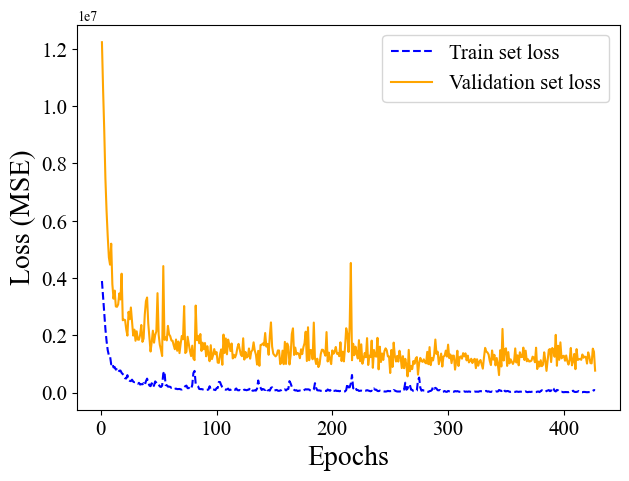

In [18]:
# let's see the training and validation accuracy by epoch
plt.figure(figsize=(7,5))

# Set the font to New Times Roman for all elements
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'blue', label='Train set loss', linestyle='--')
plt.plot(epochs, val_loss_values, 'orange', label='Validation set loss')
#plt.title('Training and testing loss')
plt.xlabel('Epochs', fontsize = 20)
plt.ylabel('Loss (MSE)', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(loc='upper right',fontsize = 15)
plt.show()

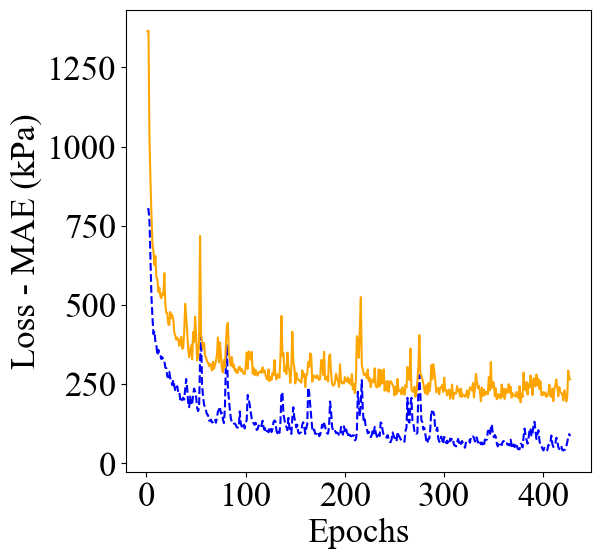

In [82]:
# let's see the training and validation accuracy by epoch
plt.figure(figsize=(6,6))

# Set the font to New Times Roman for all elements
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

loss_values1 = history_dict['mae'] # you can change this
val_loss_values1 = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values1) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values1, 'blue', label='Train set', linestyle='--')
plt.plot(epochs, val_loss_values1, 'orange', label='Validation set')
#plt.title('Training and testing MAE')
plt.xlabel('Epochs', fontsize = 25)
plt.ylabel('Loss - MAE (kPa)', fontsize = 25)
plt.xticks(ticks = [0,100, 200, 300, 400],fontsize = 25)
plt.yticks(ticks = [0,250, 500, 750, 1000, 1250],fontsize = 25)
#plt.legend(loc='upper right',fontsize = 15)
plt.savefig('MAE.png', dpi = 600, bbox_inches = 'tight')
plt.show()

In [76]:
# Convert arrays to DataFrames
df1 = pd.DataFrame(epochs)
df2 = pd.DataFrame(loss_values)
df3 = pd.DataFrame(val_loss_values)
df4 = pd.DataFrame(loss_values1)
df5 = pd.DataFrame(val_loss_values1)

# Concatenate DataFrames along the vertical axis
mse_df = pd.concat([df1, df2, df3], axis=1)
mae_df = pd.concat([df1, df4, df5], axis=1)

# Add labels to the DataFrame
mse_df.columns = ['Epochs', 'Train loss', 'Val loss']
mae_df.columns = ['Epochs', 'Train loss', 'Val loss']

# Save concatenated DataFrame to Excel file
mse_df.to_excel("MSE.xlsx", index=False)
mae_df.to_excel("MAE.xlsx", index=False)

In [20]:
print (epochs)

range(1, 428)


# Part 4 - Make predictions

5/5 [==============================] - 0s 0s/step


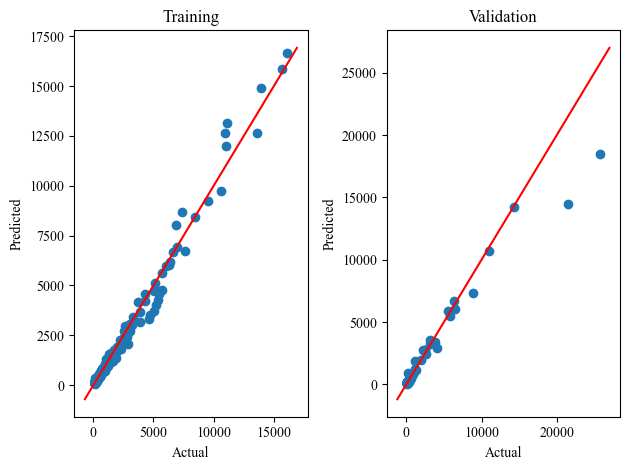

In [21]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=ann.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_val, y=ann.predict(X_val)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [22]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

5/5 [==============================] - 0s 4ms/step


Text(0, 0.5, 'Predicted data')

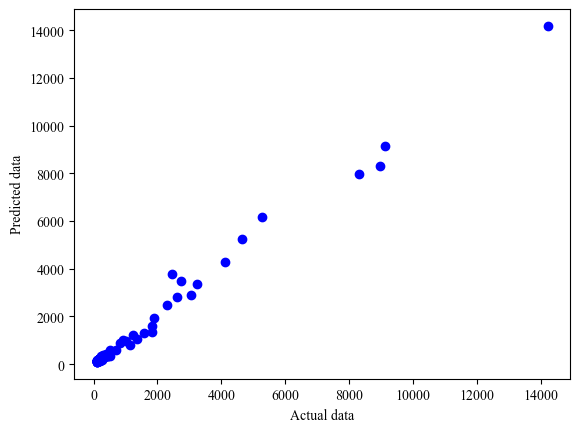

In [23]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color="blue")
#plt.plot ([0,60000],[0,60000], color = "red")
#plt.axis ([0,60000,0,60000])
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

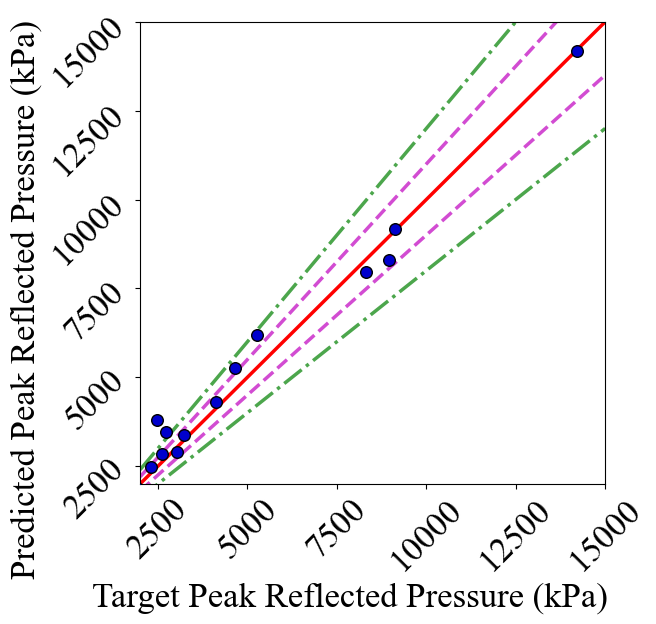

In [66]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, ax1 = plt.subplots(figsize = (6, 6))

# Add scatterplot
ax1.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')

# Set the font to New Times Roman for all elements
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

# Set ylabel with adjusted position
ax1.set_ylabel('Predicted Peak Reflected Pressure (kPa)',fontsize = 25, y=0.4)
ax1.set_xlabel('Target Peak Reflected Pressure (kPa)',fontsize = 25, x=0.45)

#plt.ylabel('Predicted Peak Reflected Pressure (kPa)',fontsize = 25)
#plt.xlabel('Actual Peak Reflected Pressure (kPa)',fontsize = 25)
plt.xticks(ticks = [2500, 5000, 7500, 10000, 12500, 15000],fontsize = 25, rotation=45)
plt.yticks(ticks = [2500, 5000, 7500, 10000, 12500, 15000],fontsize = 25, rotation=45)


x1 = np.linspace(2000,15000)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(2000, 15000)
plt.xlim(2000, 15000)
#plt.legend(loc='upper left',fontsize = 25)

#plt.grid()

ax1.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax1.spines['bottom'].set_color('black')  #setting up above X-axis tick color to red

plt.savefig('plot1.png', dpi = 600, bbox_inches = 'tight')
plt.show()

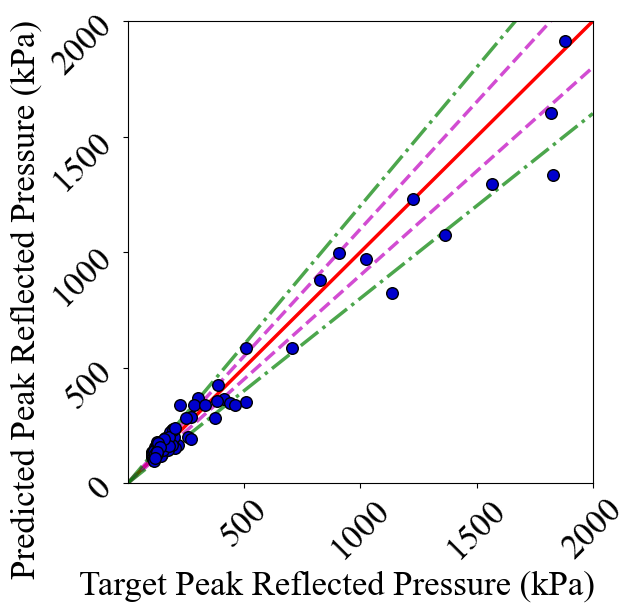

In [64]:
from sklearn.metrics import r2_score
# Initialize layout
fig2, ax2 = plt.subplots(figsize = (6, 6))

# Add scatterplot
ax2.scatter(y_test, y_pred, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')

# Set the font to New Times Roman for all elements
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

# Set ylabel with adjusted position
ax2.set_ylabel('Predicted Peak Reflected Pressure (kPa)',fontsize = 25, y=0.4)
ax2.set_xlabel('Target Peak Reflected Pressure (kPa)',fontsize = 25, x=0.45)

#plt.ylabel('Predicted Peak Reflected Pressure (kPa)',fontsize = 25)
#plt.xlabel('Actual Peak Reflected Pressure (kPa)',fontsize = 25)
plt.xticks(ticks = [500, 1000, 1500, 2000],fontsize = 25, rotation=45)
plt.yticks(fontsize = 25, rotation=45)


x1 = np.linspace(0,2000)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.1*x1, '--m', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, '-.g', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,'-.g',lw=2.5,alpha=0.7)

plt.ylim(0, 2000)
plt.xlim(0, 2000)
#plt.legend(loc='upper left',fontsize = 25)

#plt.grid()

ax1.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax1.spines['bottom'].set_color('black')   

plt.savefig('plot2.png', dpi = 600, bbox_inches = 'tight')
plt.show()#setting up above X-axis tick color to red

In [67]:
# Convert arrays to DataFrames with column labels
X_test_df = pd.DataFrame(X_test, columns = ['Explosive mass', 'Perpendicular standoff distance', 'Incident angle', 'Comp B', 'TNT'])
y_test_df = pd.DataFrame(y_test, columns = ['test'])
y_pred_df = pd.DataFrame(y_pred, columns = ['pred'])

# Concatenate DataFrames along the vertical axis
pred_df = pd.concat([X_test_df, y_test_df, y_pred_df], axis=1)

# Save concatenated DataFrame to Excel file
pred_df.to_excel('pred_df.xlsx', index=False)

In [68]:
trainpreds = ann.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, y_pred)) # test

20/20 [==============================] - 0s 2ms/step
73.63074293409076
78.8258261163885


In [69]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

0.9898933017450585


In [70]:
r2_train = r2_score(y_train, trainpreds)
print (r2_train)

0.9867028683306037


In [71]:
count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    #print ('line 1 ', line1)
    #print ('line 2 ', line2)
    mask1 = (line1 > 0) & (line2 < 0)
    #print (mask)
    count1 = np.sum(mask1+count1)
    #print (count)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

Within 10% margin 34.09%
Within 20% margin 71.97%
Out of 20% margin 28.03%


In [72]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

0.9894922422904974


In [73]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

193.39425696413923

In [74]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

78.8258261163885

In [75]:
ann.save('Peak_Reflected_Pressure_ANN_1_nodrop_noscale.h5')

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


## Load saved model

In [ ]:
ann = load_model('Peak_Reflected_Pressure_ANN_1_nodrop_noscale.h5')

## SHAP

In [46]:
dataset = pd.read_excel('RPDataset2.xlsx')
dataset = pd.get_dummies(dataset, columns=['Explosive type'])
y = dataset[('Peak reflected pressure')]
X = dataset.drop('Peak reflected pressure', axis=1)
print (X)

     Explosive mass  Perpendicular standoff distance  Incident angle  \
0               0.5                              1.5               0   
1               0.5                              1.5              15   
2               0.5                              1.5              30   
3               0.5                              1.5              45   
4               0.5                              1.5              60   
..              ...                              ...             ...   
875            25.0                             20.0               0   
876            25.0                             20.0              15   
877            25.0                             20.0              30   
878            25.0                             20.0              45   
879            25.0                             20.0              60   

     Explosive type_Composition B  Explosive type_TNT  
0                               0                   1  
1                      

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=71)
X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test,
                                                test_size=0.5,
                                                random_state=71)

In [47]:
import shap
explainer = shap.KernelExplainer(ann.predict, X_train)
shap_values = explainer.shap_values(X_train)

20/20 [==============================] - 0s 2ms/step


Using 616 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/616 [00:00<?, ?it/s]

578/578 [==============================] - 1s 2ms/step


In [48]:
explainer2 = shap.Explainer(ann.predict, X_train)
shap_values2 = explainer2(X_train)

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:   2%|▏         | 11/616 [00:00<?, ?it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   2%|▏         | 13/616 [00:10<01:48,  5.54it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:   2%|▏         | 14/616 [00:10<02:25,  4.13it/s]

16/16 [==============================] - 0s 1ms/step


ExactExplainer explainer:   2%|▏         | 15/616 [00:11<02:37,  3.81it/s]

17/17 [==============================] - 0s 969us/step


ExactExplainer explainer:   3%|▎         | 16/616 [00:11<03:14,  3.09it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   3%|▎         | 17/616 [00:11<03:27,  2.89it/s]

17/17 [==============================] - 0s 969us/step


ExactExplainer explainer:   3%|▎         | 18/616 [00:12<03:29,  2.86it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:   3%|▎         | 19/616 [00:12<03:30,  2.83it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:   3%|▎         | 20/616 [00:13<03:40,  2.71it/s]

17/17 [==============================] - 0s 977us/step


ExactExplainer explainer:   3%|▎         | 21/616 [00:13<03:35,  2.77it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   4%|▎         | 22/616 [00:13<03:23,  2.93it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   4%|▎         | 23/616 [00:14<03:25,  2.88it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   4%|▍         | 24/616 [00:14<03:24,  2.89it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   4%|▍         | 25/616 [00:14<03:24,  2.89it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:   4%|▍         | 26/616 [00:15<03:20,  2.94it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   4%|▍         | 27/616 [00:15<03:23,  2.89it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   5%|▍         | 28/616 [00:15<03:17,  2.98it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   5%|▍         | 29/616 [00:16<03:15,  3.00it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   5%|▍         | 30/616 [00:16<03:17,  2.97it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:   5%|▌         | 31/616 [00:16<03:18,  2.95it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   5%|▌         | 32/616 [00:17<03:21,  2.90it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:   5%|▌         | 33/616 [00:17<03:26,  2.82it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   6%|▌         | 34/616 [00:17<03:23,  2.86it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   6%|▌         | 35/616 [00:18<03:14,  2.99it/s]

16/16 [==============================] - 0s 1ms/step


ExactExplainer explainer:   6%|▌         | 36/616 [00:18<03:10,  3.05it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   6%|▌         | 37/616 [00:18<03:07,  3.09it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:   6%|▌         | 38/616 [00:19<03:15,  2.95it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   6%|▋         | 39/616 [00:19<03:10,  3.02it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   6%|▋         | 40/616 [00:19<03:11,  3.01it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   7%|▋         | 41/616 [00:20<03:08,  3.05it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:   7%|▋         | 42/616 [00:20<03:00,  3.18it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:   7%|▋         | 43/616 [00:20<03:13,  2.96it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:   7%|▋         | 44/616 [00:21<03:11,  2.99it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   7%|▋         | 45/616 [00:21<03:18,  2.88it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:   7%|▋         | 46/616 [00:21<03:17,  2.89it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:   8%|▊         | 47/616 [00:22<03:13,  2.94it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:   8%|▊         | 48/616 [00:22<03:17,  2.87it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   8%|▊         | 49/616 [00:22<03:15,  2.90it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:   8%|▊         | 50/616 [00:23<03:15,  2.90it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:   8%|▊         | 51/616 [00:23<03:11,  2.94it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   8%|▊         | 52/616 [00:23<03:09,  2.97it/s]

17/17 [==============================] - 0s 969us/step


ExactExplainer explainer:   9%|▊         | 53/616 [00:24<03:10,  2.95it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:   9%|▉         | 54/616 [00:24<03:12,  2.93it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:   9%|▉         | 55/616 [00:24<03:11,  2.94it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:   9%|▉         | 56/616 [00:25<03:06,  3.01it/s]

16/16 [==============================] - 0s 3ms/step


ExactExplainer explainer:   9%|▉         | 57/616 [00:25<03:10,  2.94it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:   9%|▉         | 58/616 [00:25<03:02,  3.05it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  10%|▉         | 59/616 [00:26<03:05,  3.01it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  10%|▉         | 60/616 [00:26<03:06,  2.98it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  10%|▉         | 61/616 [00:26<03:20,  2.77it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:  10%|█         | 62/616 [00:27<03:09,  2.92it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  10%|█         | 63/616 [00:27<03:21,  2.75it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  10%|█         | 64/616 [00:28<03:26,  2.67it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  11%|█         | 65/616 [00:28<03:21,  2.74it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  11%|█         | 66/616 [00:28<03:17,  2.79it/s]

16/16 [==============================] - 0s 3ms/step


ExactExplainer explainer:  11%|█         | 67/616 [00:29<03:22,  2.72it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  11%|█         | 68/616 [00:29<03:20,  2.74it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  11%|█         | 69/616 [00:29<03:21,  2.71it/s]

17/17 [==============================] - 0s 969us/step


ExactExplainer explainer:  11%|█▏        | 70/616 [00:30<03:11,  2.84it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  12%|█▏        | 71/616 [00:30<03:05,  2.94it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  12%|█▏        | 72/616 [00:30<03:13,  2.82it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:  12%|█▏        | 73/616 [00:31<03:10,  2.84it/s]

17/17 [==============================] - 0s 977us/step


ExactExplainer explainer:  12%|█▏        | 74/616 [00:31<03:14,  2.79it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  12%|█▏        | 75/616 [00:31<03:09,  2.86it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  12%|█▏        | 76/616 [00:32<03:17,  2.73it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  12%|█▎        | 77/616 [00:32<03:09,  2.85it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:  13%|█▎        | 78/616 [00:32<03:07,  2.87it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  13%|█▎        | 79/616 [00:33<03:06,  2.88it/s]

16/16 [==============================] - 0s 1ms/step


ExactExplainer explainer:  13%|█▎        | 80/616 [00:33<02:56,  3.04it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  13%|█▎        | 81/616 [00:33<02:59,  2.97it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  13%|█▎        | 82/616 [00:34<03:08,  2.84it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  13%|█▎        | 83/616 [00:34<03:13,  2.75it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  14%|█▎        | 84/616 [00:35<03:02,  2.91it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  14%|█▍        | 85/616 [00:35<03:07,  2.83it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  14%|█▍        | 86/616 [00:35<03:13,  2.74it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  14%|█▍        | 87/616 [00:36<03:09,  2.79it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  14%|█▍        | 88/616 [00:36<03:11,  2.75it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  14%|█▍        | 89/616 [00:36<03:15,  2.69it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  15%|█▍        | 90/616 [00:37<03:11,  2.75it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  15%|█▍        | 91/616 [00:37<03:12,  2.73it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  15%|█▍        | 92/616 [00:37<03:06,  2.82it/s]

16/16 [==============================] - 0s 1ms/step


ExactExplainer explainer:  15%|█▌        | 93/616 [00:38<03:01,  2.88it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  15%|█▌        | 94/616 [00:38<03:00,  2.89it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  15%|█▌        | 95/616 [00:39<03:02,  2.86it/s]

17/17 [==============================] - 0s 977us/step


ExactExplainer explainer:  16%|█▌        | 96/616 [00:39<03:11,  2.72it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  16%|█▌        | 97/616 [00:39<03:05,  2.79it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  16%|█▌        | 98/616 [00:40<03:08,  2.74it/s]

17/17 [==============================] - 0s 969us/step


ExactExplainer explainer:  16%|█▌        | 99/616 [00:40<03:07,  2.75it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  16%|█▌        | 100/616 [00:40<03:09,  2.73it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  16%|█▋        | 101/616 [00:41<03:07,  2.74it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  17%|█▋        | 102/616 [00:41<03:01,  2.83it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  17%|█▋        | 103/616 [00:41<02:59,  2.85it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  17%|█▋        | 104/616 [00:42<02:58,  2.87it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  17%|█▋        | 105/616 [00:42<02:57,  2.88it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  17%|█▋        | 106/616 [00:42<02:54,  2.93it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  17%|█▋        | 107/616 [00:43<02:59,  2.84it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  18%|█▊        | 108/616 [00:43<02:51,  2.97it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  18%|█▊        | 109/616 [00:43<02:57,  2.86it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  18%|█▊        | 110/616 [00:44<02:57,  2.85it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  18%|█▊        | 111/616 [00:44<02:59,  2.81it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  18%|█▊        | 112/616 [00:45<02:53,  2.91it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  18%|█▊        | 113/616 [00:45<02:50,  2.94it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  19%|█▊        | 114/616 [00:45<02:50,  2.94it/s]

17/17 [==============================] - 0s 782us/step


ExactExplainer explainer:  19%|█▊        | 115/616 [00:45<02:43,  3.06it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  19%|█▉        | 116/616 [00:46<02:41,  3.10it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  19%|█▉        | 117/616 [00:46<02:49,  2.95it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  19%|█▉        | 118/616 [00:47<02:51,  2.90it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  19%|█▉        | 119/616 [00:47<02:50,  2.91it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  19%|█▉        | 120/616 [00:47<02:46,  2.98it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  20%|█▉        | 121/616 [00:48<02:51,  2.88it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:  20%|█▉        | 122/616 [00:48<02:46,  2.97it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  20%|█▉        | 123/616 [00:48<02:56,  2.80it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  20%|██        | 124/616 [00:49<02:51,  2.87it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  20%|██        | 125/616 [00:49<02:43,  3.00it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  20%|██        | 126/616 [00:49<02:44,  2.97it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  21%|██        | 127/616 [00:50<02:38,  3.08it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  21%|██        | 128/616 [00:50<02:43,  2.99it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  21%|██        | 129/616 [00:50<02:46,  2.92it/s]

17/17 [==============================] - 0s 977us/step


ExactExplainer explainer:  21%|██        | 130/616 [00:51<02:46,  2.92it/s]

17/17 [==============================] - 0s 813us/step


ExactExplainer explainer:  21%|██▏       | 131/616 [00:51<02:53,  2.80it/s]

17/17 [==============================] - 0s 969us/step


ExactExplainer explainer:  21%|██▏       | 132/616 [00:51<02:59,  2.69it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  22%|██▏       | 133/616 [00:52<02:56,  2.74it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  22%|██▏       | 134/616 [00:52<03:01,  2.66it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  22%|██▏       | 135/616 [00:53<03:05,  2.60it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  22%|██▏       | 136/616 [00:53<03:04,  2.61it/s]

16/16 [==============================] - 0s 1ms/step


ExactExplainer explainer:  22%|██▏       | 137/616 [00:53<02:52,  2.77it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  22%|██▏       | 138/616 [00:54<02:52,  2.77it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:  23%|██▎       | 139/616 [00:54<02:51,  2.78it/s]

16/16 [==============================] - 0s 1ms/step


ExactExplainer explainer:  23%|██▎       | 140/616 [00:54<02:45,  2.88it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  23%|██▎       | 141/616 [00:55<02:40,  2.96it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  23%|██▎       | 142/616 [00:55<02:40,  2.95it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  23%|██▎       | 143/616 [00:55<02:38,  2.99it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  23%|██▎       | 144/616 [00:56<02:44,  2.87it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:  24%|██▎       | 145/616 [00:56<02:37,  2.99it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:  24%|██▎       | 146/616 [00:56<02:34,  3.04it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  24%|██▍       | 147/616 [00:57<02:45,  2.84it/s]

17/17 [==============================] - 0s 980us/step


ExactExplainer explainer:  24%|██▍       | 148/616 [00:57<02:50,  2.75it/s]

17/17 [==============================] - 0s 876us/step


ExactExplainer explainer:  24%|██▍       | 149/616 [00:57<02:44,  2.83it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  24%|██▍       | 150/616 [00:58<02:45,  2.82it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:  25%|██▍       | 151/616 [00:58<02:39,  2.92it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  25%|██▍       | 152/616 [00:58<02:36,  2.96it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  25%|██▍       | 153/616 [00:59<02:35,  2.99it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  25%|██▌       | 154/616 [00:59<02:36,  2.96it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:  25%|██▌       | 155/616 [00:59<02:37,  2.92it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  25%|██▌       | 156/616 [01:00<02:34,  2.99it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  25%|██▌       | 157/616 [01:00<02:37,  2.92it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  26%|██▌       | 158/616 [01:00<02:41,  2.84it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  26%|██▌       | 159/616 [01:01<02:50,  2.68it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  26%|██▌       | 160/616 [01:01<02:55,  2.61it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  26%|██▌       | 161/616 [01:02<02:45,  2.75it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  26%|██▋       | 162/616 [01:02<02:47,  2.71it/s]

17/17 [==============================] - 0s 969us/step


ExactExplainer explainer:  26%|██▋       | 163/616 [01:02<02:43,  2.76it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  27%|██▋       | 164/616 [01:03<02:43,  2.77it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  27%|██▋       | 165/616 [01:03<02:38,  2.84it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  27%|██▋       | 166/616 [01:03<02:40,  2.81it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  27%|██▋       | 167/616 [01:04<02:39,  2.82it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  27%|██▋       | 168/616 [01:04<02:39,  2.81it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  27%|██▋       | 169/616 [01:04<02:37,  2.84it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  28%|██▊       | 170/616 [01:05<02:44,  2.71it/s]

17/17 [==============================] - 0s 977us/step


ExactExplainer explainer:  28%|██▊       | 171/616 [01:05<02:44,  2.70it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:  28%|██▊       | 172/616 [01:06<02:38,  2.80it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  28%|██▊       | 173/616 [01:06<03:38,  2.02it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  28%|██▊       | 174/616 [01:07<03:23,  2.17it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  28%|██▊       | 175/616 [01:07<03:12,  2.29it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  29%|██▊       | 176/616 [01:07<03:00,  2.44it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  29%|██▊       | 177/616 [01:08<02:45,  2.65it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  29%|██▉       | 178/616 [01:08<02:45,  2.64it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  29%|██▉       | 179/616 [01:08<02:33,  2.85it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  29%|██▉       | 180/616 [01:09<02:34,  2.83it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  29%|██▉       | 181/616 [01:09<02:28,  2.93it/s]

17/17 [==============================] - 0s 977us/step


ExactExplainer explainer:  30%|██▉       | 182/616 [01:09<02:22,  3.05it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  30%|██▉       | 183/616 [01:10<02:24,  3.01it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  30%|██▉       | 184/616 [01:10<02:31,  2.86it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  30%|███       | 185/616 [01:11<02:36,  2.75it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  30%|███       | 186/616 [01:11<02:28,  2.90it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  30%|███       | 187/616 [01:11<02:22,  3.01it/s]

17/17 [==============================] - 0s 938us/step


ExactExplainer explainer:  31%|███       | 188/616 [01:11<02:19,  3.06it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  31%|███       | 189/616 [01:12<02:21,  3.02it/s]

17/17 [==============================] - 0s 977us/step


ExactExplainer explainer:  31%|███       | 190/616 [01:12<02:24,  2.94it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:  31%|███       | 191/616 [01:12<02:17,  3.10it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  31%|███       | 192/616 [01:13<02:23,  2.96it/s]

16/16 [==============================] - 0s 1ms/step


ExactExplainer explainer:  31%|███▏      | 193/616 [01:13<02:17,  3.07it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  31%|███▏      | 194/616 [01:13<02:22,  2.96it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:  32%|███▏      | 195/616 [01:14<02:17,  3.06it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  32%|███▏      | 196/616 [01:14<02:21,  2.96it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  32%|███▏      | 197/616 [01:14<02:23,  2.91it/s]

16/16 [==============================] - 0s 1ms/step


ExactExplainer explainer:  32%|███▏      | 198/616 [01:15<02:18,  3.03it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  32%|███▏      | 199/616 [01:15<02:17,  3.03it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  32%|███▏      | 200/616 [01:15<02:17,  3.03it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  33%|███▎      | 201/616 [01:16<02:19,  2.98it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  33%|███▎      | 202/616 [01:16<02:19,  2.97it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  33%|███▎      | 203/616 [01:16<02:15,  3.04it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  33%|███▎      | 204/616 [01:17<02:15,  3.04it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  33%|███▎      | 205/616 [01:17<02:20,  2.92it/s]

17/17 [==============================] - 0s 971us/step


ExactExplainer explainer:  33%|███▎      | 206/616 [01:17<02:18,  2.96it/s]

16/16 [==============================] - 0s 1ms/step


ExactExplainer explainer:  34%|███▎      | 207/616 [01:18<02:13,  3.07it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:  34%|███▍      | 208/616 [01:18<02:09,  3.15it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  34%|███▍      | 209/616 [01:18<02:19,  2.91it/s]

16/16 [==============================] - 0s 1ms/step


ExactExplainer explainer:  34%|███▍      | 210/616 [01:19<02:15,  2.99it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  34%|███▍      | 211/616 [01:19<02:13,  3.03it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  34%|███▍      | 212/616 [01:19<02:11,  3.06it/s]

17/17 [==============================] - 0s 969us/step


ExactExplainer explainer:  35%|███▍      | 213/616 [01:20<02:08,  3.14it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  35%|███▍      | 214/616 [01:20<02:07,  3.16it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  35%|███▍      | 215/616 [01:20<02:08,  3.12it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  35%|███▌      | 216/616 [01:21<02:24,  2.77it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  35%|███▌      | 217/616 [01:21<02:21,  2.82it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  35%|███▌      | 218/616 [01:22<02:19,  2.84it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  36%|███▌      | 219/616 [01:22<02:16,  2.90it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  36%|███▌      | 220/616 [01:22<02:16,  2.90it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  36%|███▌      | 221/616 [01:23<02:25,  2.72it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  36%|███▌      | 222/616 [01:23<02:21,  2.79it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  36%|███▌      | 223/616 [01:23<02:23,  2.74it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  36%|███▋      | 224/616 [01:24<02:24,  2.72it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  37%|███▋      | 225/616 [01:24<02:24,  2.70it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  37%|███▋      | 226/616 [01:24<02:21,  2.75it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  37%|███▋      | 227/616 [01:25<02:17,  2.83it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  37%|███▋      | 228/616 [01:25<02:14,  2.88it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  37%|███▋      | 229/616 [01:25<02:18,  2.80it/s]

17/17 [==============================] - 0s 969us/step


ExactExplainer explainer:  37%|███▋      | 230/616 [01:26<02:21,  2.72it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  38%|███▊      | 231/616 [01:26<02:27,  2.61it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  38%|███▊      | 232/616 [01:27<02:25,  2.64it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:  38%|███▊      | 233/616 [01:27<02:16,  2.81it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  38%|███▊      | 234/616 [01:27<02:12,  2.87it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  38%|███▊      | 235/616 [01:28<02:15,  2.80it/s]

17/17 [==============================] - 0s 977us/step


ExactExplainer explainer:  38%|███▊      | 236/616 [01:28<02:13,  2.84it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  38%|███▊      | 237/616 [01:28<02:12,  2.86it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  39%|███▊      | 238/616 [01:29<02:16,  2.76it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  39%|███▉      | 239/616 [01:29<02:14,  2.80it/s]

16/16 [==============================] - 0s 1ms/step


ExactExplainer explainer:  39%|███▉      | 240/616 [01:29<02:09,  2.90it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  39%|███▉      | 241/616 [01:30<02:15,  2.77it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  39%|███▉      | 242/616 [01:30<02:16,  2.74it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  39%|███▉      | 243/616 [01:30<02:10,  2.85it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  40%|███▉      | 244/616 [01:31<02:10,  2.86it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  40%|███▉      | 245/616 [01:31<02:08,  2.89it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  40%|███▉      | 246/616 [01:32<02:05,  2.94it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  40%|████      | 247/616 [01:32<02:04,  2.97it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  40%|████      | 248/616 [01:32<01:59,  3.08it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  40%|████      | 249/616 [01:32<01:59,  3.07it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  41%|████      | 250/616 [01:33<02:02,  2.99it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  41%|████      | 251/616 [01:33<02:00,  3.04it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  41%|████      | 252/616 [01:33<01:58,  3.08it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  41%|████      | 253/616 [01:34<01:59,  3.05it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  41%|████      | 254/616 [01:34<01:56,  3.12it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  41%|████▏     | 255/616 [01:34<01:59,  3.02it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  42%|████▏     | 256/616 [01:35<02:04,  2.88it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  42%|████▏     | 257/616 [01:35<02:08,  2.79it/s]

17/17 [==============================] - 0s 907us/step


ExactExplainer explainer:  42%|████▏     | 258/616 [01:36<02:08,  2.79it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  42%|████▏     | 259/616 [01:36<02:09,  2.75it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  42%|████▏     | 260/616 [01:36<02:07,  2.79it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  42%|████▏     | 261/616 [01:37<02:03,  2.87it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  43%|████▎     | 262/616 [01:37<02:03,  2.87it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  43%|████▎     | 263/616 [01:37<01:58,  2.97it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  43%|████▎     | 264/616 [01:38<02:09,  2.73it/s]

17/17 [==============================] - 0s 969us/step


ExactExplainer explainer:  43%|████▎     | 265/616 [01:38<02:03,  2.85it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  43%|████▎     | 266/616 [01:38<01:58,  2.95it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  43%|████▎     | 267/616 [01:39<01:57,  2.98it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  44%|████▎     | 268/616 [01:39<01:56,  3.00it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  44%|████▎     | 269/616 [01:39<02:01,  2.86it/s]

16/16 [==============================] - 0s 1ms/step


ExactExplainer explainer:  44%|████▍     | 270/616 [01:40<01:55,  2.99it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  44%|████▍     | 271/616 [01:40<02:01,  2.84it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  44%|████▍     | 272/616 [01:40<02:03,  2.79it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  44%|████▍     | 273/616 [01:41<02:00,  2.85it/s]

16/16 [==============================] - 0s 3ms/step


ExactExplainer explainer:  44%|████▍     | 274/616 [01:41<02:05,  2.73it/s]

16/16 [==============================] - 0s 3ms/step


ExactExplainer explainer:  45%|████▍     | 275/616 [01:42<02:02,  2.78it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  45%|████▍     | 276/616 [01:42<02:02,  2.78it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  45%|████▍     | 277/616 [01:42<02:08,  2.64it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  45%|████▌     | 278/616 [01:43<02:02,  2.75it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  45%|████▌     | 279/616 [01:43<01:57,  2.87it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  45%|████▌     | 280/616 [01:43<02:00,  2.78it/s]

17/17 [==============================] - 0s 4ms/step


ExactExplainer explainer:  46%|████▌     | 281/616 [01:44<02:08,  2.60it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:  46%|████▌     | 282/616 [01:44<02:04,  2.69it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  46%|████▌     | 283/616 [01:44<01:56,  2.86it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  46%|████▌     | 284/616 [01:45<01:50,  3.00it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  46%|████▋     | 285/616 [01:45<01:56,  2.85it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  46%|████▋     | 286/616 [01:46<02:01,  2.72it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  47%|████▋     | 287/616 [01:46<02:07,  2.58it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  47%|████▋     | 288/616 [01:46<02:04,  2.64it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  47%|████▋     | 289/616 [01:47<01:59,  2.74it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  47%|████▋     | 290/616 [01:47<02:01,  2.69it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  47%|████▋     | 291/616 [01:47<02:00,  2.69it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  47%|████▋     | 292/616 [01:48<02:00,  2.68it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  48%|████▊     | 293/616 [01:48<02:05,  2.58it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  48%|████▊     | 294/616 [01:49<02:00,  2.66it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  48%|████▊     | 295/616 [01:49<02:03,  2.60it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  48%|████▊     | 296/616 [01:49<02:05,  2.54it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  48%|████▊     | 297/616 [01:50<02:04,  2.56it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  48%|████▊     | 298/616 [01:50<02:05,  2.53it/s]

16/16 [==============================] - 0s 3ms/step


ExactExplainer explainer:  49%|████▊     | 299/616 [01:50<02:00,  2.63it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  49%|████▊     | 300/616 [01:51<02:01,  2.61it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  49%|████▉     | 301/616 [01:51<01:53,  2.76it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  49%|████▉     | 302/616 [01:52<01:57,  2.67it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  49%|████▉     | 303/616 [01:52<02:06,  2.48it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  49%|████▉     | 304/616 [01:52<02:00,  2.60it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  50%|████▉     | 305/616 [01:53<01:53,  2.75it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  50%|████▉     | 306/616 [01:53<01:52,  2.76it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  50%|████▉     | 307/616 [01:53<01:51,  2.77it/s]

16/16 [==============================] - 0s 1ms/step


ExactExplainer explainer:  50%|█████     | 308/616 [01:54<01:48,  2.85it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  50%|█████     | 309/616 [01:54<01:48,  2.83it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:  50%|█████     | 310/616 [01:54<01:44,  2.93it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  50%|█████     | 311/616 [01:55<01:42,  2.97it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  51%|█████     | 312/616 [01:55<01:41,  2.99it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:  51%|█████     | 313/616 [01:55<01:42,  2.96it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:  51%|█████     | 314/616 [01:56<01:42,  2.95it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  51%|█████     | 315/616 [01:56<01:41,  2.98it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  51%|█████▏    | 316/616 [01:56<01:44,  2.88it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  51%|█████▏    | 317/616 [01:57<01:46,  2.80it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  52%|█████▏    | 318/616 [01:57<01:44,  2.84it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  52%|█████▏    | 319/616 [01:58<01:41,  2.93it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  52%|█████▏    | 320/616 [01:58<01:39,  2.98it/s]

17/17 [==============================] - 0s 969us/step


ExactExplainer explainer:  52%|█████▏    | 321/616 [01:58<01:43,  2.84it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  52%|█████▏    | 322/616 [01:59<01:44,  2.82it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  52%|█████▏    | 323/616 [01:59<01:41,  2.88it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  53%|█████▎    | 324/616 [01:59<01:37,  3.00it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  53%|█████▎    | 325/616 [02:00<01:39,  2.91it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  53%|█████▎    | 326/616 [02:00<01:46,  2.72it/s]

16/16 [==============================] - 0s 967us/step


ExactExplainer explainer:  53%|█████▎    | 327/616 [02:00<01:40,  2.89it/s]

17/17 [==============================] - 0s 969us/step


ExactExplainer explainer:  53%|█████▎    | 328/616 [02:01<01:38,  2.93it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  53%|█████▎    | 329/616 [02:01<01:38,  2.93it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  54%|█████▎    | 330/616 [02:01<01:42,  2.79it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:  54%|█████▎    | 331/616 [02:02<01:37,  2.93it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  54%|█████▍    | 332/616 [02:02<01:45,  2.69it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  54%|█████▍    | 333/616 [02:02<01:41,  2.79it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  54%|█████▍    | 334/616 [02:03<01:40,  2.82it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  54%|█████▍    | 335/616 [02:03<01:38,  2.85it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  55%|█████▍    | 336/616 [02:03<01:37,  2.87it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  55%|█████▍    | 337/616 [02:04<01:42,  2.71it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  55%|█████▍    | 338/616 [02:04<01:44,  2.65it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  55%|█████▌    | 339/616 [02:05<01:41,  2.72it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  55%|█████▌    | 340/616 [02:05<01:37,  2.83it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  55%|█████▌    | 341/616 [02:05<01:39,  2.75it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  56%|█████▌    | 342/616 [02:06<01:35,  2.86it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  56%|█████▌    | 343/616 [02:06<01:36,  2.83it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  56%|█████▌    | 344/616 [02:06<01:30,  3.01it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  56%|█████▌    | 345/616 [02:07<01:33,  2.90it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  56%|█████▌    | 346/616 [02:07<01:36,  2.80it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  56%|█████▋    | 347/616 [02:07<01:33,  2.89it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  56%|█████▋    | 348/616 [02:08<01:35,  2.80it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  57%|█████▋    | 349/616 [02:08<01:39,  2.68it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  57%|█████▋    | 350/616 [02:09<01:39,  2.68it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  57%|█████▋    | 351/616 [02:09<01:42,  2.59it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  57%|█████▋    | 352/616 [02:09<01:42,  2.58it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  57%|█████▋    | 353/616 [02:10<01:37,  2.69it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:  57%|█████▋    | 354/616 [02:10<01:32,  2.82it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  58%|█████▊    | 355/616 [02:10<01:30,  2.89it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  58%|█████▊    | 356/616 [02:11<01:28,  2.92it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  58%|█████▊    | 357/616 [02:11<01:28,  2.93it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  58%|█████▊    | 358/616 [02:11<01:29,  2.87it/s]

16/16 [==============================] - 0s 1ms/step


ExactExplainer explainer:  58%|█████▊    | 359/616 [02:12<01:25,  3.00it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:  58%|█████▊    | 360/616 [02:12<01:25,  3.00it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  59%|█████▊    | 361/616 [02:12<01:25,  2.98it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  59%|█████▉    | 362/616 [02:13<01:24,  3.00it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  59%|█████▉    | 363/616 [02:13<01:26,  2.91it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  59%|█████▉    | 364/616 [02:13<01:23,  3.03it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  59%|█████▉    | 365/616 [02:14<01:24,  2.98it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  59%|█████▉    | 366/616 [02:14<01:22,  3.01it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  60%|█████▉    | 367/616 [02:14<01:21,  3.07it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  60%|█████▉    | 368/616 [02:15<01:21,  3.05it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  60%|█████▉    | 369/616 [02:15<01:21,  3.02it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:  60%|██████    | 370/616 [02:15<01:24,  2.92it/s]

16/16 [==============================] - 0s 3ms/step


ExactExplainer explainer:  60%|██████    | 371/616 [02:16<01:23,  2.92it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  60%|██████    | 372/616 [02:16<01:25,  2.85it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  61%|██████    | 373/616 [02:16<01:26,  2.80it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:  61%|██████    | 374/616 [02:17<01:30,  2.69it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  61%|██████    | 375/616 [02:17<01:27,  2.75it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  61%|██████    | 376/616 [02:18<01:28,  2.72it/s]

16/16 [==============================] - 0s 1ms/step


ExactExplainer explainer:  61%|██████    | 377/616 [02:18<01:27,  2.72it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  61%|██████▏   | 378/616 [02:18<01:26,  2.76it/s]

17/17 [==============================] - 0s 844us/step


ExactExplainer explainer:  62%|██████▏   | 379/616 [02:19<01:27,  2.70it/s]

16/16 [==============================] - 0s 3ms/step


ExactExplainer explainer:  62%|██████▏   | 380/616 [02:19<01:26,  2.74it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  62%|██████▏   | 381/616 [02:19<01:21,  2.88it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  62%|██████▏   | 382/616 [02:20<01:19,  2.93it/s]

17/17 [==============================] - 0s 939us/step


ExactExplainer explainer:  62%|██████▏   | 383/616 [02:20<01:20,  2.89it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  62%|██████▏   | 384/616 [02:20<01:20,  2.87it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  62%|██████▎   | 385/616 [02:21<01:20,  2.86it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  63%|██████▎   | 386/616 [02:21<01:20,  2.87it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  63%|██████▎   | 387/616 [02:21<01:21,  2.80it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  63%|██████▎   | 388/616 [02:22<01:23,  2.74it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  63%|██████▎   | 389/616 [02:22<01:22,  2.74it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  63%|██████▎   | 390/616 [02:23<01:18,  2.87it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  63%|██████▎   | 391/616 [02:23<01:15,  2.97it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  64%|██████▎   | 392/616 [02:23<01:16,  2.94it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  64%|██████▍   | 393/616 [02:24<01:16,  2.93it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  64%|██████▍   | 394/616 [02:24<01:16,  2.90it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  64%|██████▍   | 395/616 [02:24<01:16,  2.89it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  64%|██████▍   | 396/616 [02:25<01:15,  2.90it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  64%|██████▍   | 397/616 [02:25<01:14,  2.94it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  65%|██████▍   | 398/616 [02:25<01:14,  2.92it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  65%|██████▍   | 399/616 [02:26<01:13,  2.95it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  65%|██████▍   | 400/616 [02:26<01:13,  2.93it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  65%|██████▌   | 401/616 [02:26<01:11,  2.99it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:  65%|██████▌   | 402/616 [02:27<01:11,  3.01it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  65%|██████▌   | 403/616 [02:27<01:11,  2.98it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:  66%|██████▌   | 404/616 [02:27<01:11,  2.95it/s]

16/16 [==============================] - 0s 3ms/step


ExactExplainer explainer:  66%|██████▌   | 405/616 [02:28<01:16,  2.78it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  66%|██████▌   | 406/616 [02:28<01:16,  2.75it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  66%|██████▌   | 407/616 [02:28<01:17,  2.69it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  66%|██████▌   | 408/616 [02:29<01:13,  2.82it/s]

17/17 [==============================] - 0s 969us/step


ExactExplainer explainer:  66%|██████▋   | 409/616 [02:29<01:16,  2.71it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  67%|██████▋   | 410/616 [02:29<01:13,  2.80it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  67%|██████▋   | 411/616 [02:30<01:12,  2.83it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  67%|██████▋   | 412/616 [02:30<01:12,  2.82it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  67%|██████▋   | 413/616 [02:31<01:10,  2.89it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  67%|██████▋   | 414/616 [02:31<01:12,  2.78it/s]

16/16 [==============================] - 0s 1ms/step


ExactExplainer explainer:  67%|██████▋   | 415/616 [02:31<01:08,  2.92it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  68%|██████▊   | 416/616 [02:32<01:09,  2.86it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  68%|██████▊   | 417/616 [02:32<01:11,  2.80it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  68%|██████▊   | 418/616 [02:32<01:09,  2.85it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:  68%|██████▊   | 419/616 [02:33<01:07,  2.92it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  68%|██████▊   | 420/616 [02:33<01:05,  2.97it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  68%|██████▊   | 421/616 [02:33<01:06,  2.93it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  69%|██████▊   | 422/616 [02:34<01:06,  2.93it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  69%|██████▊   | 423/616 [02:34<01:06,  2.91it/s]

17/17 [==============================] - 0s 973us/step


ExactExplainer explainer:  69%|██████▉   | 424/616 [02:34<01:07,  2.83it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  69%|██████▉   | 425/616 [02:35<01:07,  2.84it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  69%|██████▉   | 426/616 [02:35<01:07,  2.83it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  69%|██████▉   | 427/616 [02:35<01:08,  2.77it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  69%|██████▉   | 428/616 [02:36<01:03,  2.96it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:  70%|██████▉   | 429/616 [02:36<01:03,  2.94it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  70%|██████▉   | 430/616 [02:36<01:01,  3.02it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  70%|██████▉   | 431/616 [02:37<01:00,  3.07it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  70%|███████   | 432/616 [02:37<01:03,  2.90it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  70%|███████   | 433/616 [02:37<01:00,  3.01it/s]

16/16 [==============================] - 0s 3ms/step


ExactExplainer explainer:  70%|███████   | 434/616 [02:38<01:02,  2.91it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  71%|███████   | 435/616 [02:38<01:02,  2.89it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  71%|███████   | 436/616 [02:38<01:05,  2.76it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  71%|███████   | 437/616 [02:39<01:06,  2.71it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  71%|███████   | 438/616 [02:39<01:02,  2.87it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  71%|███████▏  | 439/616 [02:40<01:01,  2.87it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  71%|███████▏  | 440/616 [02:40<01:03,  2.77it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:  72%|███████▏  | 441/616 [02:40<01:00,  2.91it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  72%|███████▏  | 442/616 [02:41<00:59,  2.92it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  72%|███████▏  | 443/616 [02:41<01:00,  2.86it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  72%|███████▏  | 444/616 [02:41<00:59,  2.87it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  72%|███████▏  | 445/616 [02:42<01:01,  2.77it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  72%|███████▏  | 446/616 [02:42<01:02,  2.74it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  73%|███████▎  | 447/616 [02:42<01:01,  2.73it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  73%|███████▎  | 448/616 [02:43<01:01,  2.73it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:  73%|███████▎  | 449/616 [02:43<01:00,  2.77it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  73%|███████▎  | 450/616 [02:43<01:00,  2.74it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  73%|███████▎  | 451/616 [02:44<01:00,  2.72it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  73%|███████▎  | 452/616 [02:44<01:00,  2.69it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  74%|███████▎  | 453/616 [02:45<00:59,  2.72it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  74%|███████▎  | 454/616 [02:45<00:58,  2.75it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  74%|███████▍  | 455/616 [02:45<00:57,  2.78it/s]

17/17 [==============================] - 0s 977us/step


ExactExplainer explainer:  74%|███████▍  | 456/616 [02:46<00:57,  2.80it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  74%|███████▍  | 457/616 [02:46<00:54,  2.90it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:  74%|███████▍  | 458/616 [02:46<00:52,  3.01it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  75%|███████▍  | 459/616 [02:47<00:51,  3.05it/s]

17/17 [==============================] - 0s 977us/step


ExactExplainer explainer:  75%|███████▍  | 460/616 [02:47<00:50,  3.09it/s]

16/16 [==============================] - 0s 634us/step


ExactExplainer explainer:  75%|███████▍  | 461/616 [02:47<00:50,  3.05it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  75%|███████▌  | 462/616 [02:48<00:49,  3.11it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  75%|███████▌  | 463/616 [02:48<00:51,  2.99it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  75%|███████▌  | 464/616 [02:48<00:51,  2.95it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  75%|███████▌  | 465/616 [02:49<00:52,  2.86it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  76%|███████▌  | 466/616 [02:49<00:50,  2.97it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  76%|███████▌  | 467/616 [02:49<00:51,  2.91it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  76%|███████▌  | 468/616 [02:50<00:51,  2.85it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  76%|███████▌  | 469/616 [02:50<00:50,  2.90it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  76%|███████▋  | 470/616 [02:50<00:52,  2.80it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  76%|███████▋  | 471/616 [02:51<00:54,  2.67it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  77%|███████▋  | 472/616 [02:51<00:51,  2.81it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  77%|███████▋  | 473/616 [02:51<00:51,  2.76it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  77%|███████▋  | 474/616 [02:52<00:51,  2.78it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  77%|███████▋  | 475/616 [02:52<00:53,  2.65it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  77%|███████▋  | 476/616 [02:53<00:55,  2.52it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  77%|███████▋  | 477/616 [02:53<00:51,  2.68it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  78%|███████▊  | 478/616 [02:53<00:51,  2.66it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  78%|███████▊  | 479/616 [02:54<00:53,  2.57it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  78%|███████▊  | 480/616 [02:54<00:52,  2.57it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  78%|███████▊  | 481/616 [02:55<00:52,  2.58it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  78%|███████▊  | 482/616 [02:55<00:49,  2.69it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:  78%|███████▊  | 483/616 [02:55<00:46,  2.86it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  79%|███████▊  | 484/616 [02:56<00:46,  2.87it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:  79%|███████▊  | 485/616 [02:56<00:43,  3.03it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  79%|███████▉  | 486/616 [02:56<00:43,  3.01it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  79%|███████▉  | 487/616 [02:57<00:42,  3.07it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  79%|███████▉  | 488/616 [02:57<00:43,  2.94it/s]

17/17 [==============================] - 0s 813us/step


ExactExplainer explainer:  79%|███████▉  | 489/616 [02:57<00:42,  2.97it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  80%|███████▉  | 490/616 [02:58<00:41,  3.03it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  80%|███████▉  | 491/616 [02:58<00:43,  2.90it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  80%|███████▉  | 492/616 [02:58<00:43,  2.85it/s]

17/17 [==============================] - 0s 751us/step


ExactExplainer explainer:  80%|████████  | 493/616 [02:59<00:42,  2.90it/s]

16/16 [==============================] - 0s 1ms/step


ExactExplainer explainer:  80%|████████  | 494/616 [02:59<00:42,  2.90it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  80%|████████  | 495/616 [02:59<00:43,  2.79it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  81%|████████  | 496/616 [03:00<00:43,  2.78it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  81%|████████  | 497/616 [03:00<00:43,  2.76it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  81%|████████  | 498/616 [03:00<00:42,  2.76it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  81%|████████  | 499/616 [03:01<00:43,  2.72it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  81%|████████  | 500/616 [03:01<00:42,  2.70it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  81%|████████▏ | 501/616 [03:02<00:42,  2.72it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  81%|████████▏ | 502/616 [03:02<00:40,  2.79it/s]

17/17 [==============================] - 0s 563us/step


ExactExplainer explainer:  82%|████████▏ | 503/616 [03:02<00:42,  2.66it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:  82%|████████▏ | 504/616 [03:03<00:40,  2.75it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:  82%|████████▏ | 505/616 [03:03<00:42,  2.63it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  82%|████████▏ | 506/616 [03:03<00:41,  2.64it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  82%|████████▏ | 507/616 [03:04<00:40,  2.66it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  82%|████████▏ | 508/616 [03:04<00:40,  2.68it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  83%|████████▎ | 509/616 [03:05<00:39,  2.74it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  83%|████████▎ | 510/616 [03:05<00:40,  2.62it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  83%|████████▎ | 511/616 [03:05<00:38,  2.73it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  83%|████████▎ | 512/616 [03:06<00:37,  2.80it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  83%|████████▎ | 513/616 [03:06<00:36,  2.82it/s]

17/17 [==============================] - 0s 969us/step


ExactExplainer explainer:  83%|████████▎ | 514/616 [03:06<00:36,  2.77it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  84%|████████▎ | 515/616 [03:07<00:35,  2.86it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  84%|████████▍ | 516/616 [03:07<00:33,  2.98it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  84%|████████▍ | 517/616 [03:07<00:32,  3.01it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  84%|████████▍ | 518/616 [03:08<00:32,  3.03it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:  84%|████████▍ | 519/616 [03:08<00:32,  2.95it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  84%|████████▍ | 520/616 [03:08<00:32,  2.97it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  85%|████████▍ | 521/616 [03:09<00:32,  2.92it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  85%|████████▍ | 522/616 [03:09<00:31,  2.95it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  85%|████████▍ | 523/616 [03:09<00:32,  2.89it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  85%|████████▌ | 524/616 [03:10<00:31,  2.88it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  85%|████████▌ | 525/616 [03:10<00:32,  2.79it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  85%|████████▌ | 526/616 [03:10<00:32,  2.81it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  86%|████████▌ | 527/616 [03:11<00:30,  2.90it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:  86%|████████▌ | 528/616 [03:11<00:30,  2.85it/s]

17/17 [==============================] - 0s 971us/step


ExactExplainer explainer:  86%|████████▌ | 529/616 [03:11<00:30,  2.88it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  86%|████████▌ | 530/616 [03:12<00:30,  2.83it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  86%|████████▌ | 531/616 [03:12<00:30,  2.80it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  86%|████████▋ | 532/616 [03:13<00:30,  2.79it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  87%|████████▋ | 533/616 [03:13<00:28,  2.95it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  87%|████████▋ | 534/616 [03:13<00:27,  3.02it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  87%|████████▋ | 535/616 [03:14<00:28,  2.85it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  87%|████████▋ | 536/616 [03:14<00:28,  2.80it/s]

17/17 [==============================] - 0s 875us/step


ExactExplainer explainer:  87%|████████▋ | 537/616 [03:14<00:26,  2.96it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  87%|████████▋ | 538/616 [03:15<00:25,  3.04it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  88%|████████▊ | 539/616 [03:15<00:26,  2.96it/s]

17/17 [==============================] - 0s 977us/step


ExactExplainer explainer:  88%|████████▊ | 540/616 [03:15<00:24,  3.05it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  88%|████████▊ | 541/616 [03:16<00:24,  3.01it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  88%|████████▊ | 542/616 [03:16<00:24,  2.98it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  88%|████████▊ | 543/616 [03:16<00:24,  3.04it/s]

17/17 [==============================] - 0s 977us/step


ExactExplainer explainer:  88%|████████▊ | 544/616 [03:17<00:23,  3.09it/s]

17/17 [==============================] - 0s 969us/step


ExactExplainer explainer:  88%|████████▊ | 545/616 [03:17<00:23,  3.07it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  89%|████████▊ | 546/616 [03:17<00:23,  2.94it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  89%|████████▉ | 547/616 [03:18<00:23,  2.89it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  89%|████████▉ | 548/616 [03:18<00:23,  2.87it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  89%|████████▉ | 549/616 [03:18<00:24,  2.76it/s]

16/16 [==============================] - 0s 3ms/step


ExactExplainer explainer:  89%|████████▉ | 550/616 [03:19<00:23,  2.79it/s]

16/16 [==============================] - 0s 1ms/step


ExactExplainer explainer:  89%|████████▉ | 551/616 [03:19<00:22,  2.85it/s]

17/17 [==============================] - 0s 969us/step


ExactExplainer explainer:  90%|████████▉ | 552/616 [03:19<00:22,  2.89it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  90%|████████▉ | 553/616 [03:20<00:22,  2.77it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  90%|████████▉ | 554/616 [03:20<00:21,  2.87it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  90%|█████████ | 555/616 [03:20<00:21,  2.84it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  90%|█████████ | 556/616 [03:21<00:20,  2.86it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  90%|█████████ | 557/616 [03:21<00:21,  2.73it/s]

17/17 [==============================] - 0s 594us/step


ExactExplainer explainer:  91%|█████████ | 558/616 [03:21<00:20,  2.85it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  91%|█████████ | 559/616 [03:22<00:20,  2.73it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  91%|█████████ | 560/616 [03:22<00:20,  2.70it/s]

16/16 [==============================] - 0s 3ms/step


ExactExplainer explainer:  91%|█████████ | 561/616 [03:23<00:19,  2.76it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  91%|█████████ | 562/616 [03:23<00:19,  2.71it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  91%|█████████▏| 563/616 [03:23<00:19,  2.73it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  92%|█████████▏| 564/616 [03:24<00:18,  2.74it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  92%|█████████▏| 565/616 [03:24<00:17,  2.86it/s]

17/17 [==============================] - 0s 907us/step


ExactExplainer explainer:  92%|█████████▏| 566/616 [03:24<00:17,  2.84it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  92%|█████████▏| 567/616 [03:25<00:17,  2.82it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  92%|█████████▏| 568/616 [03:25<00:17,  2.77it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  92%|█████████▏| 569/616 [03:25<00:16,  2.85it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  93%|█████████▎| 570/616 [03:26<00:16,  2.87it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  93%|█████████▎| 571/616 [03:26<00:15,  2.96it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  93%|█████████▎| 572/616 [03:26<00:14,  2.96it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:  93%|█████████▎| 573/616 [03:27<00:14,  2.94it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  93%|█████████▎| 574/616 [03:27<00:14,  2.95it/s]

16/16 [==============================] - 0s 1ms/step


ExactExplainer explainer:  93%|█████████▎| 575/616 [03:27<00:13,  3.10it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  94%|█████████▎| 576/616 [03:28<00:12,  3.09it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  94%|█████████▎| 577/616 [03:28<00:12,  3.01it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  94%|█████████▍| 578/616 [03:28<00:13,  2.89it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  94%|█████████▍| 579/616 [03:29<00:12,  2.98it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  94%|█████████▍| 580/616 [03:29<00:11,  3.04it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  94%|█████████▍| 581/616 [03:29<00:11,  2.97it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  94%|█████████▍| 582/616 [03:30<00:11,  2.85it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  95%|█████████▍| 583/616 [03:30<00:11,  2.84it/s]

16/16 [==============================] - 0s 3ms/step


ExactExplainer explainer:  95%|█████████▍| 584/616 [03:31<00:11,  2.86it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:  95%|█████████▍| 585/616 [03:31<00:10,  2.94it/s]

17/17 [==============================] - 0s 977us/step


ExactExplainer explainer:  95%|█████████▌| 586/616 [03:31<00:09,  3.07it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  95%|█████████▌| 587/616 [03:31<00:09,  3.04it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  95%|█████████▌| 588/616 [03:32<00:09,  3.10it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  96%|█████████▌| 589/616 [03:32<00:08,  3.01it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  96%|█████████▌| 590/616 [03:32<00:08,  3.01it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  96%|█████████▌| 591/616 [03:33<00:08,  2.99it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  96%|█████████▌| 592/616 [03:33<00:08,  2.97it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  96%|█████████▋| 593/616 [03:34<00:08,  2.83it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  96%|█████████▋| 594/616 [03:34<00:08,  2.72it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  97%|█████████▋| 595/616 [03:34<00:07,  2.77it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  97%|█████████▋| 596/616 [03:35<00:06,  2.92it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  97%|█████████▋| 597/616 [03:35<00:06,  3.00it/s]

16/16 [==============================] - 0s 2ms/step


ExactExplainer explainer:  97%|█████████▋| 598/616 [03:35<00:05,  3.09it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  97%|█████████▋| 599/616 [03:36<00:05,  2.96it/s]

17/17 [==============================] - 0s 977us/step


ExactExplainer explainer:  97%|█████████▋| 600/616 [03:36<00:05,  2.97it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  98%|█████████▊| 601/616 [03:36<00:05,  2.88it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  98%|█████████▊| 602/616 [03:37<00:04,  2.82it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  98%|█████████▊| 603/616 [03:37<00:04,  2.90it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  98%|█████████▊| 604/616 [03:37<00:04,  2.97it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  98%|█████████▊| 605/616 [03:38<00:03,  2.90it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  98%|█████████▊| 606/616 [03:38<00:03,  2.90it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  99%|█████████▊| 607/616 [03:38<00:03,  2.87it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  99%|█████████▊| 608/616 [03:39<00:02,  2.88it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  99%|█████████▉| 609/616 [03:39<00:02,  2.85it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  99%|█████████▉| 610/616 [03:39<00:02,  2.80it/s]

17/17 [==============================] - 0s 977us/step


ExactExplainer explainer:  99%|█████████▉| 611/616 [03:40<00:01,  2.95it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  99%|█████████▉| 612/616 [03:40<00:01,  2.78it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer: 100%|█████████▉| 613/616 [03:40<00:01,  2.82it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer: 100%|█████████▉| 614/616 [03:41<00:00,  2.81it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer: 100%|█████████▉| 615/616 [03:41<00:00,  2.76it/s]

16/16 [==============================] - 0s 3ms/step


ExactExplainer explainer: 100%|██████████| 616/616 [03:42<00:00,  2.67it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer: 617it [03:42,  2.72it/s]                         


In [49]:
import matplotlib as mpl
cmap = (mpl.colors.ListedColormap(['blue','orange', 'red'])
        .with_extremes(under='yellow', over='red'))

In [ ]:
print (X_train)

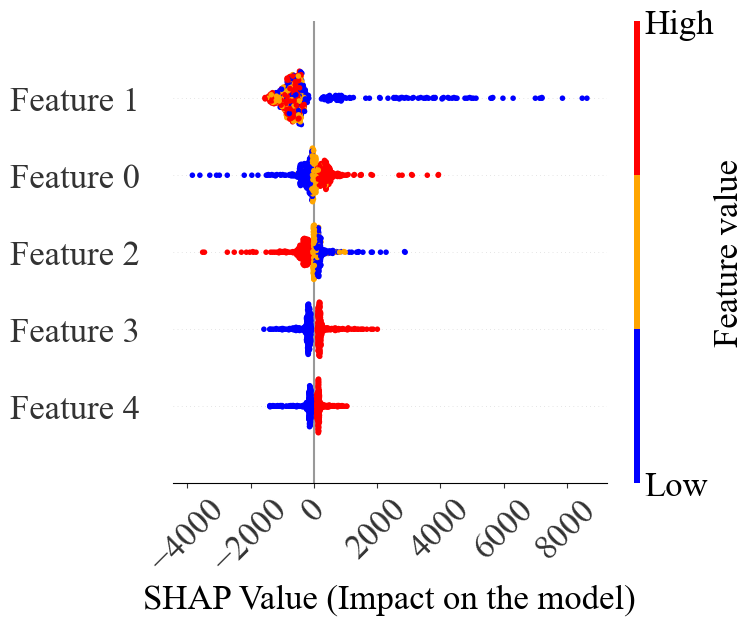

In [53]:
features = ['Explosive mass', 'Perpendicular standoff distance', 'Incident angle', 'Explosive type-CompB', 'Explosive type-TNT' ]
shap.plots.beeswarm(shap_values2, color =cmap, order=shap_values2.abs.max(0), show = False)
fig = plt.gcf()

plt.rcParams.update(plt.rcParamsDefault)
#plt.figure(facecolor='white')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
#plt.rcParams['figure.facecolor'] = 'white'

fig.set_size_inches(7,6)
plt.xlabel("SHAP Value (Impact on the model)", fontsize=25)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 25, rotation=45)

# Get colorbar
cb_ax = fig.axes[1]


# Modifying color bar parameters
cb_ax.tick_params(labelsize=25)
cb_ax.set_ylabel("Feature value", fontsize=25)
plt.savefig('SHAP1.png', dpi = 600, bbox_inches = 'tight')
plt.show()
feature_names=features

In [54]:
#Waterfall Plot (for an instance)
explainer3 = shap.Explainer(ann.predict, X_test)
#X_test.columns=features
shap_values3 = explainer3(X_test)

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  23%|██▎       | 30/132 [00:00<?, ?it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  24%|██▍       | 32/132 [00:10<00:17,  5.79it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  25%|██▌       | 33/132 [00:10<00:24,  3.99it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  26%|██▌       | 34/132 [00:11<00:29,  3.27it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  27%|██▋       | 35/132 [00:11<00:31,  3.11it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  27%|██▋       | 36/132 [00:12<00:33,  2.85it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  28%|██▊       | 37/132 [00:12<00:32,  2.94it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  29%|██▉       | 38/132 [00:12<00:32,  2.92it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  30%|██▉       | 39/132 [00:13<00:30,  3.04it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  30%|███       | 40/132 [00:13<00:30,  3.04it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  31%|███       | 41/132 [00:13<00:30,  2.96it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  32%|███▏      | 42/132 [00:14<00:30,  2.98it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  33%|███▎      | 43/132 [00:14<00:29,  3.05it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  33%|███▎      | 44/132 [00:14<00:29,  3.00it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  34%|███▍      | 45/132 [00:15<00:29,  2.99it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  35%|███▍      | 46/132 [00:15<00:29,  2.95it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  36%|███▌      | 47/132 [00:15<00:28,  2.94it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  36%|███▋      | 48/132 [00:16<00:27,  3.01it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  37%|███▋      | 49/132 [00:16<00:27,  2.99it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  38%|███▊      | 50/132 [00:16<00:28,  2.88it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  39%|███▊      | 51/132 [00:17<00:28,  2.85it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  39%|███▉      | 52/132 [00:17<00:27,  2.95it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  40%|████      | 53/132 [00:17<00:25,  3.06it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  41%|████      | 54/132 [00:18<00:25,  3.00it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  42%|████▏     | 55/132 [00:18<00:25,  3.00it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  42%|████▏     | 56/132 [00:18<00:25,  2.96it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  43%|████▎     | 57/132 [00:19<00:26,  2.81it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  44%|████▍     | 58/132 [00:19<00:26,  2.79it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  45%|████▍     | 59/132 [00:19<00:24,  2.97it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  45%|████▌     | 60/132 [00:20<00:24,  2.99it/s]

17/17 [==============================] - 0s 978us/step


ExactExplainer explainer:  46%|████▌     | 61/132 [00:20<00:23,  2.97it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  47%|████▋     | 62/132 [00:20<00:23,  3.00it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  48%|████▊     | 63/132 [00:21<00:24,  2.83it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  48%|████▊     | 64/132 [00:21<00:24,  2.74it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  49%|████▉     | 65/132 [00:21<00:23,  2.81it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  50%|█████     | 66/132 [00:22<00:23,  2.84it/s]

17/17 [==============================] - 0s 969us/step


ExactExplainer explainer:  51%|█████     | 67/132 [00:22<00:22,  2.94it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  52%|█████▏    | 68/132 [00:22<00:21,  2.97it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  52%|█████▏    | 69/132 [00:23<00:21,  2.99it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  53%|█████▎    | 70/132 [00:23<00:20,  3.03it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  54%|█████▍    | 71/132 [00:23<00:19,  3.06it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  55%|█████▍    | 72/132 [00:24<00:20,  2.91it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  55%|█████▌    | 73/132 [00:24<00:21,  2.81it/s]

17/17 [==============================] - 0s 977us/step


ExactExplainer explainer:  56%|█████▌    | 74/132 [00:24<00:20,  2.88it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  57%|█████▋    | 75/132 [00:25<00:19,  2.89it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  58%|█████▊    | 76/132 [00:25<00:19,  2.89it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  58%|█████▊    | 77/132 [00:26<00:19,  2.86it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  59%|█████▉    | 78/132 [00:26<00:19,  2.84it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  60%|█████▉    | 79/132 [00:26<00:19,  2.75it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  61%|██████    | 80/132 [00:27<00:18,  2.87it/s]

17/17 [==============================] - 0s 4ms/step


ExactExplainer explainer:  61%|██████▏   | 81/132 [00:27<00:17,  2.88it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  62%|██████▏   | 82/132 [00:27<00:17,  2.86it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  63%|██████▎   | 83/132 [00:28<00:16,  2.90it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  64%|██████▎   | 84/132 [00:28<00:16,  2.99it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  64%|██████▍   | 85/132 [00:28<00:15,  2.96it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  65%|██████▌   | 86/132 [00:29<00:15,  2.97it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  66%|██████▌   | 87/132 [00:29<00:14,  3.01it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  67%|██████▋   | 88/132 [00:29<00:14,  2.98it/s]

17/17 [==============================] - 0s 977us/step


ExactExplainer explainer:  67%|██████▋   | 89/132 [00:30<00:14,  3.00it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  68%|██████▊   | 90/132 [00:30<00:13,  3.10it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  69%|██████▉   | 91/132 [00:30<00:13,  3.03it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  70%|██████▉   | 92/132 [00:31<00:12,  3.09it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  70%|███████   | 93/132 [00:31<00:13,  2.99it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  71%|███████   | 94/132 [00:31<00:12,  3.01it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  72%|███████▏  | 95/132 [00:32<00:13,  2.68it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  73%|███████▎  | 96/132 [00:32<00:13,  2.67it/s]

17/17 [==============================] - 0s 970us/step


ExactExplainer explainer:  73%|███████▎  | 97/132 [00:32<00:12,  2.81it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  74%|███████▍  | 98/132 [00:33<00:12,  2.76it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  75%|███████▌  | 99/132 [00:33<00:11,  2.79it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  76%|███████▌  | 100/132 [00:33<00:10,  2.92it/s]

16/16 [==============================] - 0s 1ms/step


ExactExplainer explainer:  77%|███████▋  | 101/132 [00:34<00:10,  2.84it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  77%|███████▋  | 102/132 [00:34<00:10,  2.96it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  78%|███████▊  | 103/132 [00:34<00:09,  2.95it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  79%|███████▉  | 104/132 [00:35<00:09,  2.96it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  80%|███████▉  | 105/132 [00:35<00:09,  2.90it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  80%|████████  | 106/132 [00:36<00:08,  2.89it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  81%|████████  | 107/132 [00:36<00:09,  2.67it/s]

17/17 [==============================] - 0s 907us/step


ExactExplainer explainer:  82%|████████▏ | 108/132 [00:36<00:08,  2.80it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  83%|████████▎ | 109/132 [00:37<00:07,  2.93it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  83%|████████▎ | 110/132 [00:37<00:07,  2.83it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  84%|████████▍ | 111/132 [00:37<00:07,  2.74it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  85%|████████▍ | 112/132 [00:38<00:06,  2.90it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  86%|████████▌ | 113/132 [00:38<00:06,  2.86it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  86%|████████▋ | 114/132 [00:38<00:06,  2.92it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  87%|████████▋ | 115/132 [00:39<00:06,  2.79it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  88%|████████▊ | 116/132 [00:39<00:05,  2.91it/s]

17/17 [==============================] - 0s 909us/step


ExactExplainer explainer:  89%|████████▊ | 117/132 [00:39<00:05,  2.95it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  89%|████████▉ | 118/132 [00:40<00:04,  3.02it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  90%|█████████ | 119/132 [00:40<00:04,  3.07it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  91%|█████████ | 120/132 [00:40<00:03,  3.02it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  92%|█████████▏| 121/132 [00:41<00:03,  3.07it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  92%|█████████▏| 122/132 [00:41<00:03,  3.02it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  93%|█████████▎| 123/132 [00:41<00:03,  2.91it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  94%|█████████▍| 124/132 [00:42<00:02,  2.95it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  95%|█████████▍| 125/132 [00:42<00:02,  2.77it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  95%|█████████▌| 126/132 [00:42<00:02,  2.75it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  96%|█████████▌| 127/132 [00:43<00:01,  2.70it/s]

17/17 [==============================] - 0s 977us/step


ExactExplainer explainer:  97%|█████████▋| 128/132 [00:43<00:01,  2.82it/s]

17/17 [==============================] - 0s 3ms/step


ExactExplainer explainer:  98%|█████████▊| 129/132 [00:44<00:01,  2.85it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer:  98%|█████████▊| 130/132 [00:44<00:00,  2.94it/s]

17/17 [==============================] - 0s 1ms/step


ExactExplainer explainer:  99%|█████████▉| 131/132 [00:44<00:00,  2.97it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer: 100%|██████████| 132/132 [00:44<00:00,  3.04it/s]

17/17 [==============================] - 0s 2ms/step


ExactExplainer explainer: 133it [00:45,  2.27it/s]                         


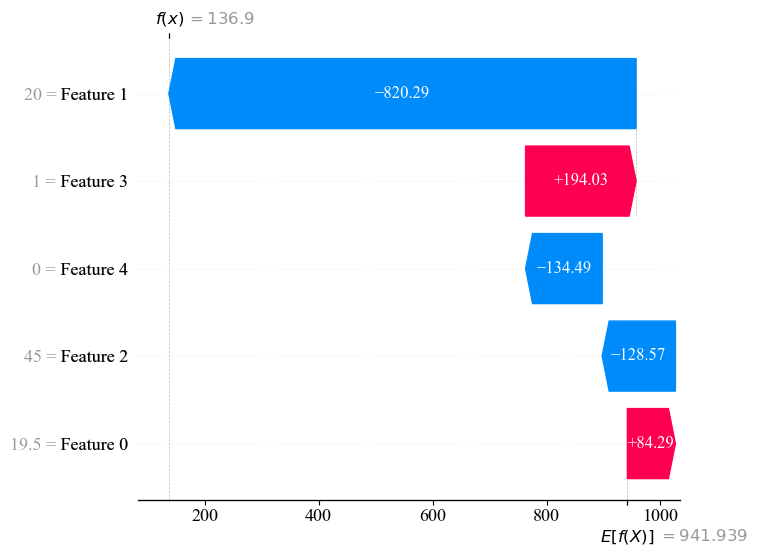

In [55]:
shap.waterfall_plot(shap_values3[56], show=False)
#fig2, ax2 = plt.subplots()
plt.gcf()
plt.gcf().set_size_inches(7, 6)
plt.rc('font', size=40)
plt.rcParams['font.weight'] = 'normal'

#plt.xlabel('SHAP Value', fontsize = 25)

#ax2.set_xlabel('SHAP Value', fontsize = 25)
#ax2.xaxis.set_label_coords(0.5, 0.1)
plt.savefig('SHAP2.png', dpi = 600, bbox_inches = 'tight')
plt.show()

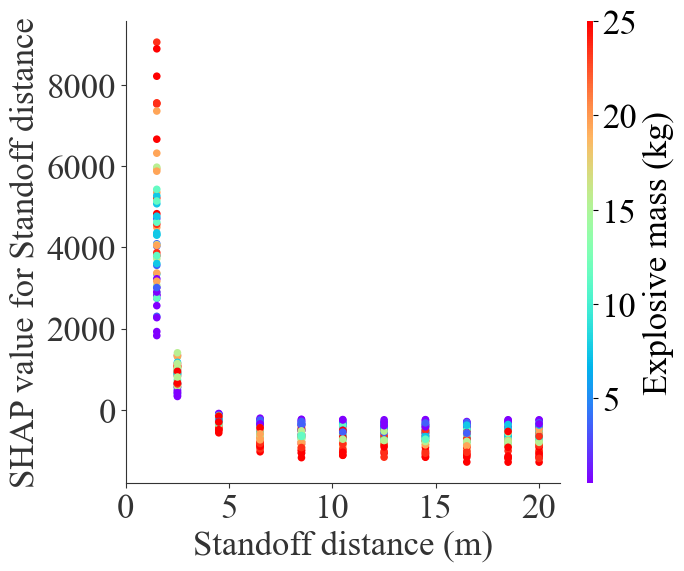

In [56]:
#Partial Dependenace Plot
shap.dependence_plot(1, shap_values[0], X_train, feature_names = features, show=False, cmap = "rainbow", dot_size = 30)
fig3 = plt.gcf()
plt.gcf().set_size_inches(7,6)
plt.ylabel("SHAP value for Standoff distance", fontsize = 25)
plt.xlabel("Standoff distance (m)",fontsize = 25)
plt.yticks(fontsize = 25)
plt.xticks(ticks = [0, 5, 10, 15, 20],fontsize = 25)
plt.xlim (0, 21)
#plt.ylim (-1000, 6000)
#plt.grid (visible = True, which = 'major', axis = 'y')

# Get colorbar
cb_ax3 = fig3.axes[1] 

# Modifying color bar parameters
cb_ax3.tick_params(labelsize=25)
cb_ax3.set_ylabel("Explosive mass (kg)", fontsize=25)
plt.savefig('SHAP3.png', dpi = 600, bbox_inches = 'tight')
plt.show()

In [ ]:
#Partial Dependenace Plot
shap.dependence_plot(0, shap_values[0], X_train, feature_names = features, show=False, cmap = "rainbow", dot_size = 30)
fig4 = plt.gcf()
plt.gcf().set_size_inches(7,6)
plt.ylabel("SHAP value for Explosive mass", fontsize = 25)
plt.xlabel("Explosive mass (kg)",fontsize = 25)
plt.yticks(fontsize = 25)
plt.xticks(ticks = [0, 5, 10, 15, 20, 25],fontsize = 25)
plt.xlim (0, 26)
#plt.ylim (-2500, 2000)
#plt.grid (visible = True, which = 'major', axis = 'y')

# Get colorbar
cb_ax4 = fig4.axes[1] 

# Modifying color bar parameters
cb_ax4.tick_params(labelsize=25)
cb_ax4.set_ylabel("Standoff distance", fontsize=25)
plt.savefig('SHAP4.png', dpi = 600, bbox_inches = 'tight')
plt.show()

In [ ]:
#Partial Dependenace Plot
shap.dependence_plot(ind = 'Explosive mass',
                     shap_values = shap_values[0],
                     features = X_train,
                     feature_names = features,
                     interaction_index = 'Explosive type-TNT',
                     show=False, cmap=plt.get_cmap("winter"), dot_size = 30)
fig5 = plt.gcf()
plt.gcf().set_size_inches(7,6)
plt.ylabel("SHAP value for Explosive mass", fontsize = 25)
plt.xlabel("Explosive mass (kg)",fontsize = 25)
plt.yticks(fontsize = 25)
plt.xticks(ticks = [0, 5, 10, 15, 20, 25],fontsize = 25)
plt.xlim (0, 26)
#plt.ylim (-2500, 2000)
#plt.grid (visible = True, which = 'major', axis = 'y')

# Get colorbar
cb_ax5 = fig5.axes[1] 

# Modifying color bar parameters
cb_ax5.tick_params(labelsize=25)
#cb_ax5.set_ylabel("Standoff distance", fontsize=25)
plt.savefig('SHAP5.png', dpi = 600, bbox_inches = 'tight')
plt.show()